# Visualizing output of convolutional layers with Keras 2.x

This is heavly based on the code available in: https://github.com/yashk2810/Visualization-of-Convolutional-Layers/blob/master/Visualizing%20Filters%20Python3%20Theano%20Backend.ipynb

Updates are made to make the code compatible with Keras 2.x, where the image channels and filters should be represented in the last dimension.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import MaxPooling2D, ZeroPadding2D
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
from keras import backend as K
from keras.utils import np_utils
%matplotlib inline

/Users/carlosns/tensorenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
# Data loading + reshape to 4D
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# in Keras 2.x the dimension with image channels is the last one
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

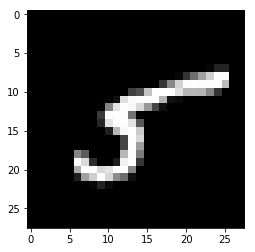

In [3]:
# visualizing the example image
plt.imshow(np.squeeze(X_train[65]), cmap='gray')

In [5]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [24]:
# Defining CNN Model 
model = Sequential()

# input shape should consider the number of channels as the last dimension
model.add(Convolution2D(32, (3, 3), input_shape=(28,28,1)))

# creating activation layer whose output will be visualized
convout1 = Activation('relu')
model.add(convout1)

# this layer can also be used to visualize its output
convout2 = MaxPooling2D()
model.add(convout2)

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
# modify the number of epochs if you want to see the result after a number of training iterations
model.fit(X_train, Y_train, batch_size=128, epochs=500, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 25s 414us/step - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0374 - val_acc: 0.9873
Epoch 2/500
60000/60000 [==============================] - 24s 406us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0396 - val_acc: 0.9875
Epoch 3/500
60000/60000 [==============================] - 24s 392us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.0428 - val_acc: 0.9867
Epoch 4/500
60000/60000 [==============================] - 27s 442us/step - loss: 0.0164 - acc: 0.9948 - val_loss: 0.0409 - val_acc: 0.9872
Epoch 5/500
60000/60000 [==============================] - 28s 466us/step - loss: 0.0138 - acc: 0.9954 - val_loss: 0.0362 - val_acc: 0.9891
Epoch 6/500
60000/60000 [==============================] - 27s 442us/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.0402 - val_acc: 0.9885
Epoch 7/500
60000/60000 [==============================] - 23s 388us/step - loss: 0.0108 - acc: 0.9963 - val_l

Epoch 59/500
60000/60000 [==============================] - 23s 387us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.0731 - val_acc: 0.9882
Epoch 60/500
60000/60000 [==============================] - 23s 385us/step - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0769 - val_acc: 0.9866
Epoch 61/500
60000/60000 [==============================] - 23s 385us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.0723 - val_acc: 0.9883
Epoch 62/500
60000/60000 [==============================] - 23s 387us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0796 - val_acc: 0.9870
Epoch 63/500
60000/60000 [==============================] - 23s 386us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0718 - val_acc: 0.9876
Epoch 64/500
60000/60000 [==============================] - 23s 383us/step - loss: 8.6024e-04 - acc: 0.9998 - val_loss: 0.0790 - val_acc: 0.9883
Epoch 65/500
60000/60000 [==============================] - 23s 385us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0697 - val_acc: 0.9887
Epoch 66/

60000/60000 [==============================] - 23s 391us/step - loss: 6.3542e-04 - acc: 0.9997 - val_loss: 0.0824 - val_acc: 0.9897
Epoch 117/500
60000/60000 [==============================] - 21s 357us/step - loss: 6.8365e-04 - acc: 0.9998 - val_loss: 0.0908 - val_acc: 0.9881
Epoch 118/500
60000/60000 [==============================] - 23s 390us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0855 - val_acc: 0.9882
Epoch 119/500
60000/60000 [==============================] - 25s 409us/step - loss: 8.4009e-04 - acc: 0.9997 - val_loss: 0.0798 - val_acc: 0.9892
Epoch 120/500
60000/60000 [==============================] - 29s 477us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0812 - val_acc: 0.9896
Epoch 121/500
60000/60000 [==============================] - 31s 508us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.0784 - val_acc: 0.9894
Epoch 122/500
60000/60000 [==============================] - 31s 520us/step - loss: 7.8812e-04 - acc: 0.9998 - val_loss: 0.0751 - val_acc: 0.9893
Epoc

60000/60000 [==============================] - 28s 467us/step - loss: 6.4431e-04 - acc: 0.9998 - val_loss: 0.0774 - val_acc: 0.9908
Epoch 173/500
60000/60000 [==============================] - 29s 487us/step - loss: 4.8761e-04 - acc: 0.9998 - val_loss: 0.0886 - val_acc: 0.9894
Epoch 174/500
60000/60000 [==============================] - 27s 443us/step - loss: 7.0779e-04 - acc: 0.9998 - val_loss: 0.0986 - val_acc: 0.9888
Epoch 175/500
60000/60000 [==============================] - 27s 447us/step - loss: 6.6868e-04 - acc: 0.9997 - val_loss: 0.0967 - val_acc: 0.9889
Epoch 176/500
60000/60000 [==============================] - 26s 441us/step - loss: 7.0579e-04 - acc: 0.9998 - val_loss: 0.0875 - val_acc: 0.9890
Epoch 177/500
60000/60000 [==============================] - 26s 440us/step - loss: 4.9338e-04 - acc: 0.9999 - val_loss: 0.0872 - val_acc: 0.9897
Epoch 178/500
60000/60000 [==============================] - 34s 563us/step - loss: 5.6418e-04 - acc: 0.9998 - val_loss: 0.0920 - val_acc:

60000/60000 [==============================] - 29s 481us/step - loss: 4.3016e-04 - acc: 0.9999 - val_loss: 0.0904 - val_acc: 0.9905
Epoch 229/500
60000/60000 [==============================] - 29s 487us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0946 - val_acc: 0.9900
Epoch 230/500
60000/60000 [==============================] - 29s 482us/step - loss: 4.9695e-04 - acc: 0.9998 - val_loss: 0.1037 - val_acc: 0.9898
Epoch 231/500
60000/60000 [==============================] - 29s 486us/step - loss: 7.8494e-04 - acc: 0.9998 - val_loss: 0.1027 - val_acc: 0.9894
Epoch 232/500
60000/60000 [==============================] - 29s 482us/step - loss: 4.7463e-04 - acc: 0.9998 - val_loss: 0.1017 - val_acc: 0.9889
Epoch 233/500
60000/60000 [==============================] - 30s 495us/step - loss: 5.8113e-04 - acc: 0.9999 - val_loss: 0.0991 - val_acc: 0.9892
Epoch 234/500
60000/60000 [==============================] - 33s 551us/step - loss: 2.6198e-04 - acc: 0.9999 - val_loss: 0.0924 - val_acc: 0.9

60000/60000 [==============================] - 29s 477us/step - loss: 6.1448e-04 - acc: 0.9999 - val_loss: 0.1052 - val_acc: 0.9895
Epoch 285/500
60000/60000 [==============================] - 28s 473us/step - loss: 5.4174e-04 - acc: 0.9998 - val_loss: 0.1061 - val_acc: 0.9887
Epoch 286/500
60000/60000 [==============================] - 28s 473us/step - loss: 2.9778e-04 - acc: 0.9999 - val_loss: 0.0980 - val_acc: 0.9892
Epoch 287/500
60000/60000 [==============================] - 28s 473us/step - loss: 9.9155e-04 - acc: 0.9998 - val_loss: 0.1064 - val_acc: 0.9891
Epoch 288/500
60000/60000 [==============================] - 28s 474us/step - loss: 6.4542e-04 - acc: 0.9998 - val_loss: 0.0996 - val_acc: 0.9888
Epoch 289/500
60000/60000 [==============================] - 28s 468us/step - loss: 9.0173e-04 - acc: 0.9997 - val_loss: 0.0958 - val_acc: 0.9886
Epoch 290/500
60000/60000 [==============================] - 29s 478us/step - loss: 9.9266e-04 - acc: 0.9998 - val_loss: 0.1053 - val_acc:

60000/60000 [==============================] - 29s 477us/step - loss: 8.5861e-04 - acc: 0.9998 - val_loss: 0.1056 - val_acc: 0.9894
Epoch 341/500
60000/60000 [==============================] - 29s 477us/step - loss: 3.0830e-04 - acc: 0.9999 - val_loss: 0.1001 - val_acc: 0.9895
Epoch 342/500
60000/60000 [==============================] - 29s 482us/step - loss: 2.9787e-04 - acc: 0.9999 - val_loss: 0.0986 - val_acc: 0.9899
Epoch 343/500
60000/60000 [==============================] - 29s 481us/step - loss: 5.0149e-04 - acc: 0.9998 - val_loss: 0.0997 - val_acc: 0.9900
Epoch 344/500
60000/60000 [==============================] - 29s 478us/step - loss: 8.2236e-04 - acc: 0.9998 - val_loss: 0.0995 - val_acc: 0.9897
Epoch 345/500
60000/60000 [==============================] - 29s 481us/step - loss: 6.1190e-04 - acc: 0.9998 - val_loss: 0.1007 - val_acc: 0.9887
Epoch 346/500
60000/60000 [==============================] - 29s 479us/step - loss: 3.6936e-04 - acc: 0.9999 - val_loss: 0.0972 - val_acc:

60000/60000 [==============================] - 27s 442us/step - loss: 2.2428e-04 - acc: 0.9999 - val_loss: 0.1047 - val_acc: 0.9896
Epoch 397/500
60000/60000 [==============================] - 27s 446us/step - loss: 6.1769e-04 - acc: 0.9998 - val_loss: 0.1036 - val_acc: 0.9896
Epoch 398/500
60000/60000 [==============================] - 27s 450us/step - loss: 9.9019e-04 - acc: 0.9998 - val_loss: 0.1063 - val_acc: 0.9905
Epoch 399/500
60000/60000 [==============================] - 27s 449us/step - loss: 2.2827e-04 - acc: 0.9999 - val_loss: 0.0980 - val_acc: 0.9898
Epoch 400/500
60000/60000 [==============================] - 26s 438us/step - loss: 7.2861e-04 - acc: 0.9999 - val_loss: 0.1020 - val_acc: 0.9893
Epoch 401/500
60000/60000 [==============================] - 27s 443us/step - loss: 4.8747e-04 - acc: 0.9999 - val_loss: 0.1045 - val_acc: 0.9899
Epoch 402/500
60000/60000 [==============================] - 26s 435us/step - loss: 4.3696e-04 - acc: 0.9999 - val_loss: 0.1088 - val_acc:

60000/60000 [==============================] - 29s 478us/step - loss: 9.4886e-04 - acc: 0.9998 - val_loss: 0.1170 - val_acc: 0.9892
Epoch 453/500
60000/60000 [==============================] - 28s 475us/step - loss: 2.6059e-04 - acc: 0.9999 - val_loss: 0.1055 - val_acc: 0.9898
Epoch 454/500
60000/60000 [==============================] - 28s 471us/step - loss: 4.7390e-04 - acc: 0.9998 - val_loss: 0.1031 - val_acc: 0.9896
Epoch 455/500
60000/60000 [==============================] - 29s 479us/step - loss: 6.2751e-04 - acc: 0.9999 - val_loss: 0.1192 - val_acc: 0.9892
Epoch 456/500
60000/60000 [==============================] - 28s 471us/step - loss: 9.2384e-04 - acc: 0.9998 - val_loss: 0.1120 - val_acc: 0.9896
Epoch 457/500
60000/60000 [==============================] - 28s 472us/step - loss: 2.4731e-04 - acc: 0.9999 - val_loss: 0.1179 - val_acc: 0.9892
Epoch 458/500
60000/60000 [==============================] - 28s 473us/step - loss: 4.0053e-04 - acc: 0.9999 - val_loss: 0.1187 - val_acc:

Shape of image: (28, 28, 1)


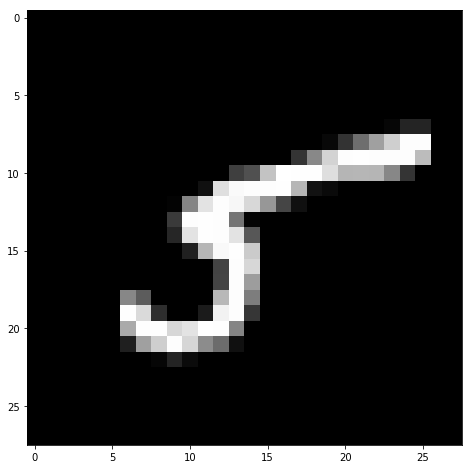

In [51]:
# choose any image to want by specifying the index
img_to_visualize = X_train[65]
# Keras requires the image to be in 4D
print ('Shape of image:', np.shape(img_to_visualize))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

# for visualization we need the image with 2 dimensions, so np.squeeze
ax.imshow(np.squeeze(img_to_visualize), cmap='gray')

# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [59]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    # last dimension identifies the number of filters
    n = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(convolutions.shape[2]): # output each one of the filters
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')
    plt.tight_layout()

Shape of conv: (26, 26, 32)
Shape of conv: (13, 13, 32)


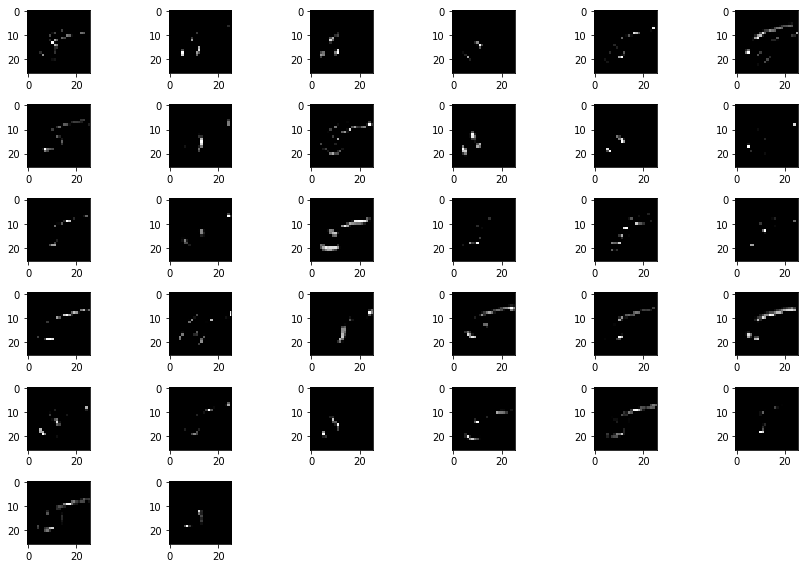

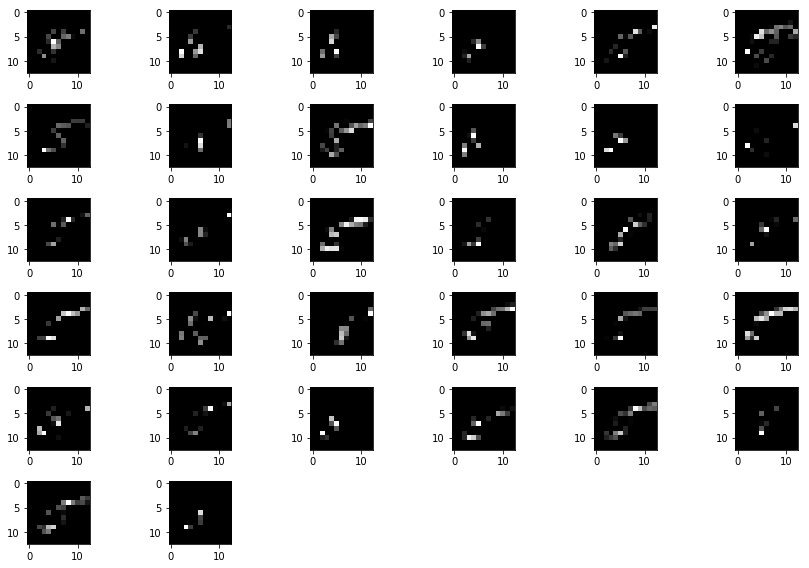

In [60]:
# Specify the layer to want to visualize
layer_to_visualize(convout1)

# As convout2 is the result of a MaxPool2D layer
# We can see that the image has blurred since
# the resolution has reduced 
layer_to_visualize(convout2)